<a href="https://colab.research.google.com/github/Jade-ChiaChunHou/Computer_Vision/blob/master/%E8%82%A1%E6%B5%B7%E5%B0%8F%E8%8B%B1%E9%9B%84_%E4%B8%8B%E8%BC%89%E8%82%A1%E5%B8%82%E8%B3%87%E6%96%99%E7%B3%BB%E5%88%97/%5BColab%5D%E4%B8%8B%E8%BC%89%E8%87%BA%E6%8C%87%E9%81%B8%E6%93%87%E6%AC%8A%E6%AF%8F%E6%97%A5%E4%BA%A4%E6%98%93%E8%A1%8C%E6%83%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Import 套件¶

In [ ]:
#下載資料套件
import urllib3
from bs4 import BeautifulSoup

#資料處理套件
import pandas as pd
from datetime import datetime, date

#畫圖套件
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Part 1: 下載期交所 臺指選擇權 每日交易行情
### 股海小英雄youtube影片：[【Python 爬蟲】台指選擇權Put/Call比免費下載 (上)｜股市多空頭趨勢預測](https://youtu.be/RqodmAWC8EE)

### 資料來源：[期交所 臺指選擇權 每日交易行情](https://www.taifex.com.tw/cht/3/dlOptDailyMarketView)
注意:查詢區間不可超過30日

用urllib3下載選擇權每日交易行情資料


In [ ]:
http = urllib3.PoolManager()
url = "https://www.taifex.com.tw/cht/3/dlOptDataDown"
res = http.request(
     'POST',
      url,
      fields={
         'down_type': 1,
         'commodity_id': 'TXO',
         'queryStartDate': '2021/08/04',
         'queryEndDate': '2021/08/11'
      }
 )

html_doc = res.data
html_doc

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



b'\xa5\xe6\xa9\xf6\xa4\xe9\xb4\xc1,\xab\xb4\xac\xf9,\xa8\xec\xb4\xc1\xa4\xeb\xa5\xf7(\xb6g\xa7O),\xbci\xac\xf9\xbb\xf9,\xb6R\xbd\xe6\xc5v,\xb6}\xbdL\xbb\xf9,\xb3\xcc\xb0\xaa\xbb\xf9,\xb3\xcc\xa7C\xbb\xf9,\xa6\xac\xbdL\xbb\xf9,\xa6\xa8\xa5\xe6\xb6q,\xb5\xb2\xba\xe2\xbb\xf9,\xa5\xbc\xa8R\xbeP\xab\xb4\xac\xf9\xbc\xc6,\xb3\xcc\xab\xe1\xb3\xcc\xa8\xce\xb6R\xbb\xf9,\xb3\xcc\xab\xe1\xb3\xcc\xa8\xce\xbd\xe6\xbb\xf9,\xbe\xfa\xa5v\xb3\xcc\xb0\xaa\xbb\xf9,\xbe\xfa\xa5v\xb3\xcc\xa7C\xbb\xf9,\xacO\xa7_\xa6]\xb0T\xae\xa7\xad\xb1\xbc\xc8\xb0\xb1\xa5\xe6\xa9\xf6,\xa5\xe6\xa9\xf6\xae\xc9\xacq\r\n2021/08/04,TXO,202108W1,15400.0000,\xb6R\xc5v,-,-,-,-,0,0,0,-,-,-,-,,\xa4@\xaf\xeb,\r\n2021/08/04,TXO,202108W1,15400.0000,\xb6R\xc5v,-,-,-,-,0,-,-,-,-,-,-,,\xbdL\xab\xe1,\r\n2021/08/04,TXO,202108W1,15400.0000,\xbd\xe6\xc5v,-,-,-,-,0,0,1381,-,-,-,-,,\xa4@\xaf\xeb,\r\n2021/08/04,TXO,202108W1,15400.0000,\xbd\xe6\xc5v,-,-,-,-,0,-,-,-,-,-,-,,\xbdL\xab\xe1,\r\n2021/08/04,TXO,202108W1,15500.0000,\xb6R\xc5v,-,-,-,-,0,0

用BeautifulSoup解析資料

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')
soup

交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
2021/08/04,TXO,202108W1,15400.0000,買權,-,-,-,-,0,0,0,-,-,-,-,,一般,
2021/08/04,TXO,202108W1,15400.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,
2021/08/04,TXO,202108W1,15400.0000,賣權,-,-,-,-,0,0,1381,-,-,-,-,,一般,
2021/08/04,TXO,202108W1,15400.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,
2021/08/04,TXO,202108W1,15500.0000,買權,-,-,-,-,0,0,0,-,-,-,-,,一般,
2021/08/04,TXO,202108W1,15500.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,
2021/08/04,TXO,202108W1,15500.0000,賣權,0.2,0.3,0.2,0.2,7,0,1850,0.1,0.3,25.5,0.2,,一般,
2021/08/04,TXO,202108W1,15500.0000,賣權,0.3,0.3,0.3,0.3,1,-,-,0.1,0.3,25.5,0.2,,盤後,
2021/08/04,TXO,202108W1,15600.0000,買權,-,-,-,-,0,0,0,-,-,-,-,,一般,
2021/08/04,TXO,202108W1,15600.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,
2021/08/04,TXO,202108W1,15600.0000,賣權,0.2,0.2,0.2,0.2,2,0,702,-,0.3,28,0.2,,一般,
2021/08/04,TXO,202108W1,15600.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,
2021/08/04,TXO,202108W1,15700.0000,買權,-,-,-,-,0,0,0,-,-,-,-,,一般,
20

把資料依行數切割

In [ ]:
soup_str = str(soup)
lines = soup_str.split('\r\n')

for i in range(5):
    print(lines[i])
    print()

交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段

2021/08/04,TXO,202108W1,15400.0000,買權,-,-,-,-,0,0,0,-,-,-,-,,一般,

2021/08/04,TXO,202108W1,15400.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,

2021/08/04,TXO,202108W1,15400.0000,賣權,-,-,-,-,0,0,1381,-,-,-,-,,一般,

2021/08/04,TXO,202108W1,15400.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,



把下載的選擇權每日交易行情資料存入dataframe內

In [ ]:
# 新增空的dataframe,定義欄位名稱
df = pd.DataFrame(columns = lines[0].split(','))

# 把選擇權資料一行一行寫入dataframe內
for i in range(1, len(lines) - 1):
    list_ = lines[i].split(',')[:-1]
    df_length = len(df)
    df.loc[df_length] = list_

#顯示dataframe前20行的資料    
df.head(20)

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
0,2021/08/04,TXO,202108W1,15400.0000,買權,-,-,-,-,0,0,0,-,-,-,-,,一般
1,2021/08/04,TXO,202108W1,15400.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後
2,2021/08/04,TXO,202108W1,15400.0000,賣權,-,-,-,-,0,0,1381,-,-,-,-,,一般
3,2021/08/04,TXO,202108W1,15400.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後
4,2021/08/04,TXO,202108W1,15500.0000,買權,-,-,-,-,0,0,0,-,-,-,-,,一般
5,2021/08/04,TXO,202108W1,15500.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後
6,2021/08/04,TXO,202108W1,15500.0000,賣權,0.2,0.3,0.2,0.2,7,0,1850,0.1,0.3,25.5,0.2,,一般
7,2021/08/04,TXO,202108W1,15500.0000,賣權,0.3,0.3,0.3,0.3,1,-,-,0.1,0.3,25.5,0.2,,盤後
8,2021/08/04,TXO,202108W1,15600.0000,買權,-,-,-,-,0,0,0,-,-,-,-,,一般
9,2021/08/04,TXO,202108W1,15600.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後


# Part 2: 將下載的臺指選擇權 每日交易行情 另存csv檔到本機

In [ ]:
from google.colab import files
df.to_csv('options.csv') 
files.download('options.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Part 3: 畫出臺指選擇權每日交易行情
### 資料轉型：把日期從字串(string)換成時間(datetime)/浮點數(float)

In [ ]:
# 資料轉型
for col in [0, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    for row in range(df.shape[0]):
        # 把"日期"從字串(string)換成時間(datetime)
        if col == 0:
            day = df.iloc[row,0].split('/')
            df.iloc[row, 0] = datetime(int(day[0]), int(day[1]), int(day[2]))  
        # 把字串(string)換成浮點數(float): "履約價", "開盤價", "最高價", "最低價", "收盤價", "成交量", "結算價", "未沖銷契約數", "最後最佳買價", "最後最佳賣價", "歷史最高價", "歷史最低價" 
        elif col != 0 and df.iloc[row, col] != '-':
            df.iloc[row, col] = float(df.iloc[row,col])

### 資料篩選：取出臺指選擇權202108W2的資料

In [ ]:
df.head(20)

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
0,2021-08-04 00:00:00,TXO,202108W1,15400,買權,-,-,-,-,0,0,0,-,-,-,-,,一般
1,2021-08-04 00:00:00,TXO,202108W1,15400,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後
2,2021-08-04 00:00:00,TXO,202108W1,15400,賣權,-,-,-,-,0,0,1381,-,-,-,-,,一般
3,2021-08-04 00:00:00,TXO,202108W1,15400,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後
4,2021-08-04 00:00:00,TXO,202108W1,15500,買權,-,-,-,-,0,0,0,-,-,-,-,,一般
5,2021-08-04 00:00:00,TXO,202108W1,15500,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後
6,2021-08-04 00:00:00,TXO,202108W1,15500,賣權,0.2,0.3,0.2,0.2,7,0,1850,0.1,0.3,25.5,0.2,,一般
7,2021-08-04 00:00:00,TXO,202108W1,15500,賣權,0.3,0.3,0.3,0.3,1,-,-,0.1,0.3,25.5,0.2,,盤後
8,2021-08-04 00:00:00,TXO,202108W1,15600,買權,-,-,-,-,0,0,0,-,-,-,-,,一般
9,2021-08-04 00:00:00,TXO,202108W1,15600,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後


In [ ]:
df.describe()

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
count,8688,8688,8688,8688.0,8688,8688,8688,8688,8688,8688.0,8688,8688,8688,8688,8688,8688,8688,8688
unique,6,1,7,106.0,2,682,694,675,685,1030.0,1059,1167,669,684,409,447,1,2
top,2021-08-04 00:00:00,TXO,202109,17400.0,賣權,-,-,-,-,0.0,-,-,-,-,-,-,,一般
freq,1542,8688,1992,146.0,4344,5618,5618,5618,5618,5618.0,4278,4278,5766,5741,5618,5618,8688,4410


In [ ]:
df['到期月份(週別)'].unique()

array(['202108W1', '202108W2', '202108  ', '202109  ', '202110  ',
       '202112  ', '202203  '], dtype=object)


選到期月份(週別)是'202108W2'的資料

In [ ]:
df.loc[df['到期月份(週別)'] == '202108W2']

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
220,2021-08-04 00:00:00,TXO,202108W2,15700,買權,-,-,-,-,0,1920,0,-,-,-,-,,一般
221,2021-08-04 00:00:00,TXO,202108W2,15700,賣權,1.8,2.2,1.6,1.6,386,1.6,323,1.3,1.7,2.2,1.6,,一般
222,2021-08-04 00:00:00,TXO,202108W2,15800,買權,-,-,-,-,0,1820,0,-,-,-,-,,一般
223,2021-08-04 00:00:00,TXO,202108W2,15800,賣權,-,-,-,-,0,1.8,0,-,-,-,-,,一般
224,2021-08-04 00:00:00,TXO,202108W2,15900,買權,-,-,-,-,0,1720,0,-,-,-,-,,一般
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,2021-08-11 00:00:00,TXO,202108W2,19300,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後
7440,2021-08-11 00:00:00,TXO,202108W2,19400,買權,0.4,0.4,0.4,0.4,1,0,172,-,0.4,0.8,0.2,,一般
7441,2021-08-11 00:00:00,TXO,202108W2,19400,買權,0.5,0.8,0.5,0.6,60,-,-,-,0.4,0.8,0.2,,盤後
7442,2021-08-11 00:00:00,TXO,202108W2,19400,賣權,-,-,-,-,0,0,0,-,-,-,-,,一般


選到期月份(週別)是'202108W2'&買權的資料

In [ ]:
df.loc[(df['到期月份(週別)']  == '202108W2') & (df['買賣權'] == '買權')]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
220,2021-08-04 00:00:00,TXO,202108W2,15700,買權,-,-,-,-,0,1920,0,-,-,-,-,,一般
222,2021-08-04 00:00:00,TXO,202108W2,15800,買權,-,-,-,-,0,1820,0,-,-,-,-,,一般
224,2021-08-04 00:00:00,TXO,202108W2,15900,買權,-,-,-,-,0,1720,0,-,-,-,-,,一般
226,2021-08-04 00:00:00,TXO,202108W2,16000,買權,-,-,-,-,0,1620,0,-,-,-,-,,一般
228,2021-08-04 00:00:00,TXO,202108W2,16100,買權,-,-,-,-,0,1520,0,-,-,-,-,,一般
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,2021-08-11 00:00:00,TXO,202108W2,19200,買權,0.1,0.1,0.1,0.1,30,-,-,-,0.4,0.1,0.1,,盤後
7436,2021-08-11 00:00:00,TXO,202108W2,19300,買權,-,-,-,-,0,0,28,-,-,-,-,,一般
7437,2021-08-11 00:00:00,TXO,202108W2,19300,買權,0.1,0.1,0.1,0.1,110,-,-,-,0.4,0.3,0.1,,盤後
7440,2021-08-11 00:00:00,TXO,202108W2,19400,買權,0.4,0.4,0.4,0.4,1,0,172,-,0.4,0.8,0.2,,一般


選到期月份(週別)是'202108W2'&買權&履約價17800的資料

In [ ]:
df.loc[(df['到期月份(週別)']  == '202108W2') & (df['買賣權'] == '買權') & (df['履約價'] == 17800)]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
278,2021-08-04 00:00:00,TXO,202108W2,17800,買權,51,61,36.5,55,3181,55,1619,54,55,61,36.5,,一般
1658,2021-08-05 00:00:00,TXO,202108W2,17800,買權,50,52,33.5,38,7190,38,4264,37.5,38,61,33.5,,一般
1659,2021-08-05 00:00:00,TXO,202108W2,17800,買權,57,58,43.5,46.5,3593,-,-,45.5,46.5,61,36.5,,盤後
3080,2021-08-06 00:00:00,TXO,202108W2,17800,買權,34,34,13.5,14,12048,14,7557,13.5,14.5,61,13.5,,一般
3081,2021-08-06 00:00:00,TXO,202108W2,17800,買權,31,35.5,16,35.5,5222,-,-,35,35.5,61,16,,盤後
4504,2021-08-09 00:00:00,TXO,202108W2,17800,買權,9.5,9.5,2.3,3.4,7092,3.4,6699,3.3,3.5,61,2.3,,一般
4505,2021-08-09 00:00:00,TXO,202108W2,17800,買權,14.5,16.5,8.7,9.6,4669,-,-,9.1,10.5,61,8.7,,盤後
5928,2021-08-10 00:00:00,TXO,202108W2,17800,買權,2,3,0.5,0.7,4278,0.7,5810,0.5,0.7,61,0.5,,一般
5929,2021-08-10 00:00:00,TXO,202108W2,17800,買權,3.5,4.3,2.7,2.9,1035,-,-,2.8,3.5,61,2.3,,盤後
7360,2021-08-11 00:00:00,TXO,202108W2,17800,買權,0.6,0.6,0.1,0.2,421,0,5452,0.1,0.2,61,0.1,,一般


選到期月份(週別)是'202108W2'&買權&履約價17800&一般交易時段的資料

In [ ]:
df.loc[(df['到期月份(週別)']  == '202108W2') & (df['買賣權'] == '買權') & (df['履約價'] == 17800) & (df['交易時段'] == '一般')]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
278,2021-08-04 00:00:00,TXO,202108W2,17800,買權,51,61,36.5,55,3181,55,1619,54,55,61,36.5,,一般
1658,2021-08-05 00:00:00,TXO,202108W2,17800,買權,50,52,33.5,38,7190,38,4264,37.5,38,61,33.5,,一般
3080,2021-08-06 00:00:00,TXO,202108W2,17800,買權,34,34,13.5,14,12048,14,7557,13.5,14.5,61,13.5,,一般
4504,2021-08-09 00:00:00,TXO,202108W2,17800,買權,9.5,9.5,2.3,3.4,7092,3.4,6699,3.3,3.5,61,2.3,,一般
5928,2021-08-10 00:00:00,TXO,202108W2,17800,買權,2,3,0.5,0.7,4278,0.7,5810,0.5,0.7,61,0.5,,一般
7360,2021-08-11 00:00:00,TXO,202108W2,17800,買權,0.6,0.6,0.1,0.2,421,0,5452,0.1,0.2,61,0.1,,一般


用get_options函式篩選資料

In [ ]:
def get_options(option_df, contract_period, put_or_call, strike_price, trade_period):
    
    option_df = df.loc[(df['到期月份(週別)'] == contract_period) & \
                       (df['買賣權'] == put_or_call) & \
                       (df['履約價'] == strike_price) & \
                       (df['交易時段'] == trade_period)]
    return option_df

In [ ]:
get_options(df, '202108W2', '買權', 17800, '一般')

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段
278,2021-08-04 00:00:00,TXO,202108W2,17800,買權,51,61,36.5,55,3181,55,1619,54,55,61,36.5,,一般
1658,2021-08-05 00:00:00,TXO,202108W2,17800,買權,50,52,33.5,38,7190,38,4264,37.5,38,61,33.5,,一般
3080,2021-08-06 00:00:00,TXO,202108W2,17800,買權,34,34,13.5,14,12048,14,7557,13.5,14.5,61,13.5,,一般
4504,2021-08-09 00:00:00,TXO,202108W2,17800,買權,9.5,9.5,2.3,3.4,7092,3.4,6699,3.3,3.5,61,2.3,,一般
5928,2021-08-10 00:00:00,TXO,202108W2,17800,買權,2,3,0.5,0.7,4278,0.7,5810,0.5,0.7,61,0.5,,一般
7360,2021-08-11 00:00:00,TXO,202108W2,17800,買權,0.6,0.6,0.1,0.2,421,0,5452,0.1,0.2,61,0.1,,一般


拿選擇權履約價17400-17700的資料

In [ ]:
txo_17400_c = get_options(df, '202108W2', '買權', 17400, '一般')
txo_17500_c = get_options(df, '202108W2', '買權', 17500, '一般')
txo_17600_c = get_options(df, '202108W2', '買權', 17600, '一般')
txo_17700_c = get_options(df, '202108W2', '買權', 17700, '一般')


txo_17400_p = get_options(df, '202108W2', '賣權', 17400, '一般')
txo_17500_p = get_options(df, '202108W2', '賣權', 17500, '一般')
txo_17600_p = get_options(df, '202108W2', '賣權', 17600, '一般')
txo_17700_p = get_options(df, '202108W2', '賣權', 17700, '一般')

### 用matplotlib套件：畫出選擇權202108W2走勢圖

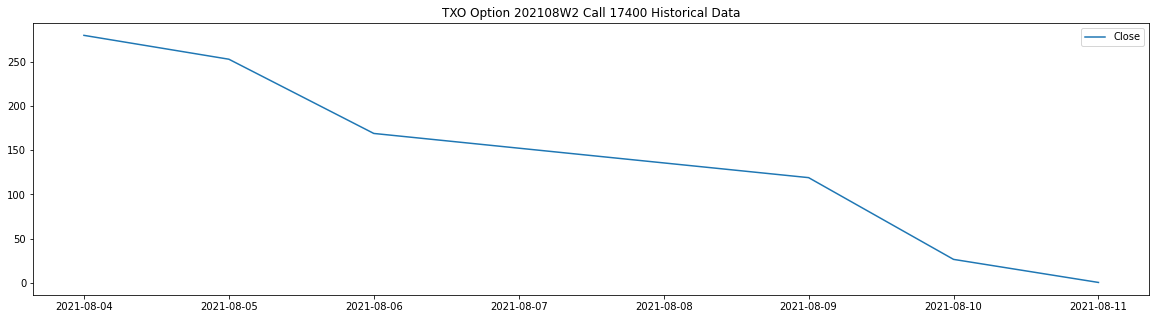

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.title('TXO Option 202108W2 Call 17400 Historical Data')

plt.plot(txo_17400_c['交易日期'], txo_17400_c['收盤價'])

plt.legend(['Close'])

### 用plotly套件：畫出選擇權202108W2各履約價走勢圖

In [ ]:
# Initialize figure with subplots
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("買權", "賣權")
)

# Add traces
fig.add_trace(go.Scatter(x = txo_17400_c["交易日期"], y = txo_17400_c["收盤價"], name = "買權17400"), row=1, col=1)
fig.add_trace(go.Scatter(x = txo_17500_c["交易日期"], y = txo_17500_c["收盤價"], name = "買權17500"), row=2, col=1)
fig.add_trace(go.Scatter(x = txo_17600_c["交易日期"], y = txo_17600_c["收盤價"], name = "買權17600"), row=3, col=1)
fig.add_trace(go.Scatter(x = txo_17700_c["交易日期"], y = txo_17700_c["收盤價"], name = "買權17700"), row=4, col=1)

fig.add_trace(go.Scatter(x = txo_17400_p["交易日期"], y = txo_17400_p["收盤價"], name = "賣權17400"), row=1, col=2)
fig.add_trace(go.Scatter(x = txo_17500_p["交易日期"], y = txo_17500_p["收盤價"], name = "賣權17500"), row=2, col=2)
fig.add_trace(go.Scatter(x = txo_17600_p["交易日期"], y = txo_17600_p["收盤價"], name = "賣權17600"), row=3, col=2)
fig.add_trace(go.Scatter(x = txo_17700_p["交易日期"], y = txo_17700_p["收盤價"], name = "賣權17700"), row=4, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="17400", row=1, col=2)
fig.update_yaxes(title_text="17500", row=2, col=2)
fig.update_yaxes(title_text="17600", row=3, col=2)
fig.update_yaxes(title_text="17700", row=4, col=2)

# Update title and height
fig.update_layout(title_text="台指選 每日交易行情 - 202108W2", width = 1000, height=2000)

fig.show()